In [1]:
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.io import read_image
from tqdm import tqdm as tqdm
import matplotlib.pyplot as plt

In [3]:
# Preparation of the existing pre-trained model
# https://pytorch.org/vision/stable/models.html 

weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
# image preprocessing method 
preprocess = weights.transforms()




--2023-02-14 09:11:23--  https://c1.staticflickr.com/4/3679/20425270075_83b24838b4_z.jpg
Resolving c1.staticflickr.com (c1.staticflickr.com)... 65.9.50.84, 2600:9000:20fc:2400:0:5a51:64c9:c681, 2600:9000:20fc:4000:0:5a51:64c9:c681, ...
Connecting to c1.staticflickr.com (c1.staticflickr.com)|65.9.50.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘image.jpg’

image.jpg               [ <=>                ]  76,95K  --.-KB/s    in 0,02s   

2023-02-14 09:11:23 (3,76 MB/s) - ‘image.jpg’ saved [78801]



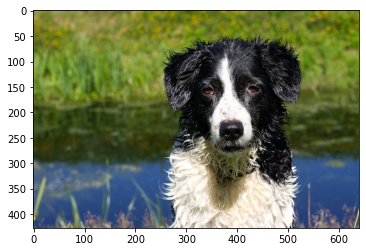

In [10]:
# Download the image
!wget "https://c1.staticflickr.com/4/3679/20425270075_83b24838b4_z.jpg" -O "image.jpg"
# Read the image
img = read_image("image.jpg")
# Vizualize the image
plt.imshow(img.permute(1, 2, 0))

In [11]:
# Preprocess the image to batch of (1, 3, 224, 224)
# 1 - batch size
# 3 - number of channels
# 224 - image size

batch = preprocess(img).unsqueeze(0)
batch.shape


torch.Size([1, 3, 224, 224])

In [12]:
# Make prediction
prediction = model(batch).squeeze(0).softmax(0)
# Classify the image to 1000 classes
prediction.shape


torch.Size([1000])

In [13]:
# Get the top 5 predictions
top_5_idx = prediction.argsort()[-5:]
# Get the top 5 probabilities
score_list = prediction[top_5_idx]
score_list

tensor([0.0017, 0.0018, 0.0018, 0.0019, 0.0020], grad_fn=<IndexBackward0>)

In [14]:
category_name = [weights.meta["categories"][i] for i in top_5_idx.numpy()]
category_name

['bubble', 'skunk', 'Appenzeller', 'Bernese mountain dog', 'Border collie']

In [16]:
for category, score in reversed(list(zip(category_name, score_list))):
    print(f"{category}: {100 * score:.3f}%")

Border collie: 0.204%
Bernese mountain dog: 0.187%
Appenzeller: 0.183%
skunk: 0.176%
bubble: 0.169%


In [17]:
score

tensor(0.0017, grad_fn=<UnbindBackward0>)